In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import math as mt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split


sns.set()

np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})
r = np.random.normal(0,1,2)
s = np.random.normal(0,1,2)


(399, 2)
(319, 2)
(319, 1)


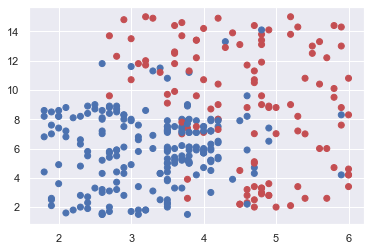

In [2]:
data = pd.read_csv("dataCompras.csv")


aMean = np.mean(data["Age"])
sMean = np.mean(data["EstimatedSalary"])
data["Age"] = data["Age"].replace(np.nan,aMean)/10
data["EstimatedSalary"] = data["EstimatedSalary"].replace(np.nan,sMean)/10000

datosX = np.array(data.loc[:,["Age","EstimatedSalary"]]) 
datosY = np.array(data.loc[:,["Purchased"]]) 

t = 1000
#datosX = (np.random.rand(t,2)*6 - 3)*np.pi
datosX = np.random.rand(t,2)*20 - 5

A  = np.array([1,-0.5,-0.5,-1]).reshape(2,2)
b = np.array([-6,9]).reshape(2,1)
datosY = np.array([(1 if x.T @ A @ x + b.T @ x < 0 else  0) for x in datosX]).reshape(-1,1)
#datosY = np.array([(1 if np.sin(mt.sqrt(x.T @ x)) > 0 else  0) for x in datosX]).reshape(-1,1)



datosX = np.array(data.loc[:,["Age","EstimatedSalary"]]) 
datosY = np.array(data.loc[:,["Purchased"]]) 

datosX_Tr, datosX_Ts, datosY_Tr, datosY_Ts = train_test_split(datosX,datosY, test_size = 0.2)

print(datosX.shape)

print(datosX_Tr.shape)
print(datosY_Tr.shape)

colores =[]
cs = ["b","r"]
colores = [cs[i] for i in datosY_Tr[:,0]]

plt.scatter(datosX_Tr[:,0],datosX_Tr[:,1],c = colores)
plt.show()

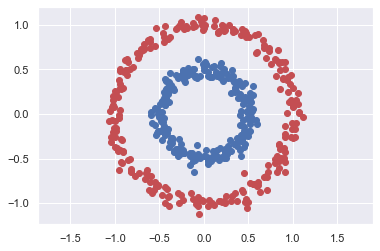

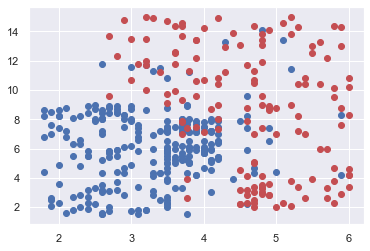

In [3]:
n = 500
p = 2

X,Y = make_circles(n_samples=n,factor = 0.5,noise = 0.05)
Y = Y[:,np.newaxis]
plt.scatter(X[Y[:, 0] == 0,0],X[Y[:, 0] == 0,1], c='r')
plt.scatter(X[Y[:, 0] == 1,0],X[Y[:, 0] == 1,1], c='b')
plt.axis("equal")
plt.show()

plt.scatter(datosX[datosY[:, 0] == 0,0],datosX[datosY[:, 0] == 0,1], c='b')
plt.scatter(datosX[datosY[:, 0] == 1,0],datosX[datosY[:, 0] == 1,1], c='r')
plt.show()

In [3]:
class MLP:
    
    #Coleccion de numero de neuronas por capa
    T = []
    
    #coleccion de transformaciones lineales
    F = []
    L = 0
    
    #Coleccion de umbrales 
    B = []
    
    #Coleccion de salidas de cada capa (Se utilizarán para el Backpropagation)
    
    A = []
    
    def __init__(self,F0,B0):
        
        self.F = F0
        self.B = B0
        
    def __init__(self,Top):
        
        L = len(Top)
        self.F = []
        self.B = []
        self.T = Top
        for t in range(0,len(Top)-1):
            
            
            #R = []
            
            #for i in range(0,Top[t+1]):
            #    R.append(np.random.normal(0,1,Top[t]))
                
            #self.B.append(np.random.normal(0,3,Top[t+1]))
            #self.F.append(np.array(R))
            self.B.append(np.random.rand(1,Top[t+1])* 4 -2 ) 
            self.F.append(np.random.rand(Top[t],Top[t+1])*4 -2)
            
            
            
        
    #funcion de activación
    def sigmoide(self,x):
        
            sig = 1 / (1 + np.exp(-x))
            return sig
        
    def sigVector(self,X):
        
        p = []
        for x in X:
            p.append(self.sigmoide(x))
            
        return np.array(p)
    
    def aplicar(self,X):
        
        Fi = self.F
        Bi = self.B
        self.A = []
        
        if(len(Fi) != len(Bi)):
            return "Matrices incompatibles"
        
        Xi = X

        
        for i in range(0,len(Fi)):
            
            Ti = Fi[i]
            Y =  Xi @ Ti + Bi[i]
            
            Xi = self.sigmoide(Y)
            self.A.append(Xi)
            
            
        return np.array(Xi)
            
        
    def agregaCapa(self,A,b):
        
        dSalida =len(self.F[len(self.F)-1])
        dEntrada = len(A[0])
        if(dSalida == dEntrada):
            self.F.append(A)
            self.B.append(b)
        else:
            return "Los tamaños de matrices no coinciden"
        
    def ajustaParam(self,capa,h,k,p):
        
        Fi = self.F
        
        if(capa < len(Fi)):
            if(h < len(Fi[capa]) and k < len(Fi[capa][0])):
                self.F[capa][h][k] = p
                return 1
            
        return 0
    
    def obtieneParam(self,capa,h,k):
        
        Fi = self.F
        
        if(capa < len(Fi)):
            if(h < len(Fi[capa]) and k < len(Fi[capa][0])):
                return self.F[capa][h][k]
            
        return 0
    
    def ajustaBias(self,capa,i,b):
        
        Bi = self.B
        
        if(capa < len(Bi)):
            if(i < len(Bi[capa])):
                self.B[capa][i] = b
                return 1
            
        return 0
    
    def obtieneBias(self,capa,i):
        
        Bi = self.B
        
        if(capa < len(Bi)):
            if(i < len(Bi[capa])):
                return self.B[capa][i]
            
        return 0
    
    
    
    def numNeuronas(self):
        
        k = 0
        for Fi in self.F:
            k = k + len(Fi)*(len(Fi[0])+1)
            
        return k
    
    
    def entrenamiento(self,X,Y,costo,dT):

        a = self.aplicar(X)

        #backProp

        deltas = []

        for i in reversed(range(0,len(self.F))):

            a = self.A[i]

            if(i == len(self.F)-1):
                deltas.insert(0,costo(a,Y) * (a*(1-a)))
            else:
                deltas.insert(0,deltas[0] @ Fi * (a*(1-a)))

            Fi = self.F[i].T

            self.B[i] = self.B[i] - np.mean(deltas[0],axis=0,keepdims=True) * dT

            if(i>0):
                ai = self.A[i-1].T
            else:
                ai = X.T
            self.F[i] = self.F[i] - ai  @ deltas[0] * dT
    
        return  error(self.aplicar(X),Y)

In [4]:
def error(X,Y):
    
    return np.mean((X-Y)**2)
    
def gError(X,Y):
    
    return (X-Y)



0.07899780277292442 



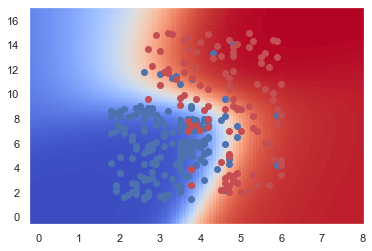

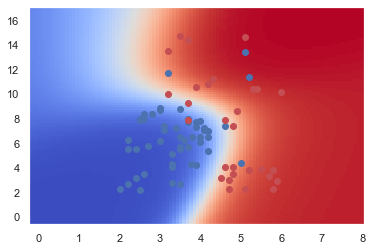

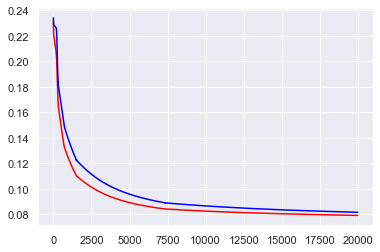

Fin del entrenamiento
Error mínimo:  0.07899780277292442
Error predict: 0.08145378716143796


In [9]:
import time 
from IPython.display import clear_output

#MLP2 = MLP([2,100,100,100,100,100,1])
MLP2 = MLP([2,4,8,4,1])

dT = 0.005
ErrorGrafica  = []
ErrorPrueba = []
eMin = 1
Params = []


offset = 2
minX = min(np.array(datosX)[:,0].reshape(-1,1))[0] - offset
maxX = max(np.array(datosX)[:,0].reshape(-1,1))[0] + offset

minY = min(np.array(datosX)[:,1].reshape(-1,1))[0] - offset
maxY = max(np.array(datosX)[:,1].reshape(-1,1))[0] + offset


res = 100
_x0 = np.linspace(minX,maxX,res)
_x1 = np.linspace(minY,maxY,res)

#_x0 = np.linspace(-1.5,1.5,res+1)
#_x1 = np.linspace(-1.5,1.5,res+1)

_Y = np.zeros((res,res))
_Y2 = np.zeros((res,res))
_E = np.zeros((res,res))

_XM, _YM = np.meshgrid(_x0,_x1)
_M = np.concatenate((_XM.reshape(-1,1),_YM.reshape(-1,1)),axis=1)

unos = np.ones(_M.shape[0]).reshape(-1,1)
zeros = np.zeros(_M.shape[0]).reshape(-1,1)
_MM = np.concatenate((_M,unos),axis=1)
_MH = np.concatenate((_M,zeros),axis=1)

G0 = 0

for i in range(0,500000):
    
    G = MLP2.entrenamiento(datosX_Tr,datosY_Tr,gError,dT)
    #G = entrenamiento(MLP2,X,Y,gError,dT)
    
    if(G < eMin):
        eMin = G
        Params = [MLP2.F,MLP2.B]
    else:
        dT = dT/2
        
    ErrorGrafica.append(G)
    ErrorPrueba.append(error(datosY_Ts,MLP2.aplicar(datosX_Ts)))
    if(i%2000 == 0):
        
        
        clear_output()
        print(G,"\n")
        _Y = MLP2.aplicar(_M).reshape(res,res)
        
        #print("Mujeres\n")
        plt.pcolormesh(_x0, _x1, _Y,cmap='coolwarm',shading='nearest')
        plt.scatter(datosX_Tr[datosY_Tr[:, 0] <= 0,0],datosX_Tr[datosY_Tr[:, 0] <= 0,1], c='b')
        plt.scatter(datosX_Tr[datosY_Tr[:, 0] >  0,0],datosX_Tr[datosY_Tr[:, 0] > 0,1], c='r')
        
        plt.show()  
        
        
        plt.pcolormesh(_x0, _x1, _Y,cmap='coolwarm',shading='nearest')
        plt.scatter(datosX_Ts[datosY_Ts[:, 0] <= 0,0],datosX_Ts[datosY_Ts[:, 0] <= 0,1], c='b')
        plt.scatter(datosX_Ts[datosY_Ts[:, 0] >  0,0],datosX_Ts[datosY_Ts[:, 0] > 0,1], c='r')
        plt.show()  
        
        
        
        #print("Hombres\n")
        #plt.pcolormesh(_x0, _x1, _Y2,cmap='coolwarm',shading='nearest')
        #plt.scatter(datosXH[datosYH[:, 0] <= 0,0],datosXH[datosYH[:, 0] <= 0,1], c='b')
        #plt.scatter(datosXH[datosYH[:, 0] > 0,0],datosXH[datosYH[:, 0] > 0,1], c='r')
        #plt.show()
        
        #plt.scatter(X[Y[:, 0] == 0,0],X[Y[:, 0] == 0,1], c='b')
        #plt.scatter(X[Y[:, 0] == 1,0],X[Y[:, 0] == 1,1], c='r')
        #plt.axis("equal")
        #plt.show()
        
        plt.plot(range(len(ErrorGrafica)),ErrorGrafica,c='red')
        plt.plot(range(len(ErrorPrueba)),ErrorPrueba,c='blue')
        plt.show()
        
        if(abs(G-G0)< 0.0005):
            break
            
        G0 = G

print("Fin del entrenamiento\nError mínimo: ",eMin)

print("Error predict: " + str(error(datosY_Ts,MLP2.aplicar(datosX_Ts))))

In [103]:
print("Error predict: " + str(error(datosY_Ts,MLP2.aplicar(datosX_Ts))))

Error predict: 0.13429336381153634


In [15]:
__W = MLP2.F
__B = MLP2.B


print(MLP2.aplicar([6.5,7]))

[[0.965108]]
